In [176]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 'xx-large'
       }

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Display the data table for preview
city_df.tail() # Right: city, drive_count, type
ride_df.tail() # Left: city, date, fare, ride_id


# Merge the data into a single dataframe

city_ride_df = pd.merge(ride_df, city_df, on="city", how="left") # there are dupes of "driver_count"!!
city_ride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [177]:
# Obtain the x and y coordinates for each of the three city types
urban_count = urban_df.groupby("city")["ride_id"].count() # x value
urban_fare = urban_df.groupby("city")["fare"].mean() # y value
urban_driver = urban_df.groupby("city").mean()["driver_count"] # s value (dot size)

suburban_count = suburban_df.groupby("city")["ride_id"].count() # x value
suburban_fare = suburban_df.groupby("city")["fare"].mean() # y value
suburban_driver = suburban_df.groupby("city").mean()["driver_count"] # s value (dot size)

rural_count = rural_df.groupby("city")["ride_id"].count() # x value
rural_fare = rural_df.groupby("city")["fare"].mean() # y value
rural_driver = rural_df.groupby("city").mean()["driver_count"] # s value (dot size)

total_rides = len(city_ride_df)


## Bubble Plot of Ride Sharing Data

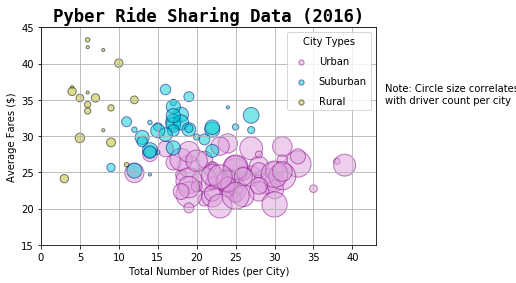

In [178]:
# colors = ["tab:olive", "darkturquoise", "plum"]

plt.scatter(urban_count, urban_fare, marker="o", facecolors="plum", edgecolors="purple", alpha=.5, s=urban_driver*10, label="Urban")
plt.scatter(suburban_count, suburban_fare, marker="o", facecolors="darkturquoise", edgecolors="navy", alpha=.5, s=suburban_driver*10, label="Suburban")
plt.scatter(rural_count, rural_fare, marker="o", facecolors="tab:olive", edgecolors="black", alpha=.5, s=rural_driver*10, label="Rural")

# tick_locations = [value for value in x_axis]
plt.xlim(0, 43)
plt.ylim(15, 45)

plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fares ($)")
plt.title("Pyber Ride Sharing Data (2016)", **font)
plt.annotate('''Note: Circle size correlates 
with driver count per city''', 
             xy=(385,180), xycoords='figure pixels')

# Create a legend
lgnd = plt.legend(loc="best", title='City Types', scatterpoints=1, frameon=True, labelspacing=1)
lgnd.legendHandles[0]._sizes = [27]
lgnd.legendHandles[1]._sizes = [27]
lgnd.legendHandles[2]._sizes = [27]

plt.grid()
plt.show

# Save Figure
plt.savefig('pyber_plot.png', bbox_inches = "tight")


## Total Fares by City Type

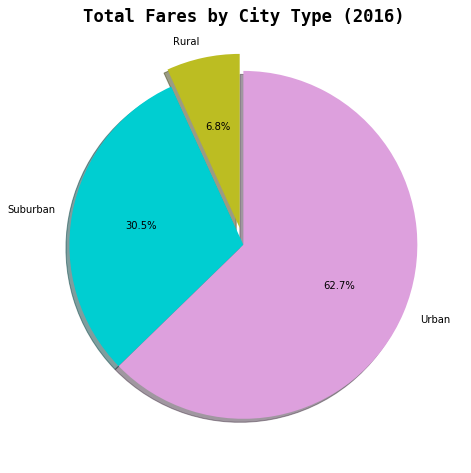

In [180]:
# Repeated info on all pie charts
explode = [.1, 0, 0]
colors = ["tab:olive", "darkturquoise", "plum"]

# Calculate Type Percents
# sort_values so that the colors list matches up
fares = city_ride_df.groupby("type")["fare"].sum().sort_values(ascending=True)
fares_percentages = fares/total_rides
sizes = list(fares)
labels = fares.index


# Build Pie Chart

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Fares by City Type (2016)", **font)

# plt.axis('tight')

plt.show
# Save Figure
plt.savefig('TotalFaresCityType.png', bbox='tight')


## Total Rides by City Type

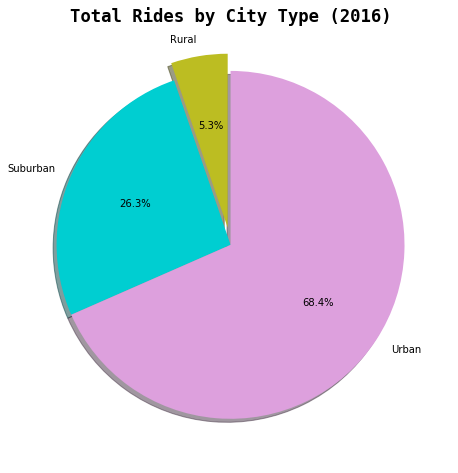

In [175]:
# Calculate Ride Percents
total_rides =  len(city_ride_df)
rides = city_ride_df.groupby("type")["ride_id"].count().sort_values(ascending=True)
rides_percentages = rides/total_rides
sizes = list(rides_percentages)
labels = rides.index

# Build Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Rides by City Type (2016)", **font)
# plt.axis('tight')

plt.show

# Save Figure
plt.savefig('TotalRidesCityType.png', bbox="tight")


## Total Drivers by City Type

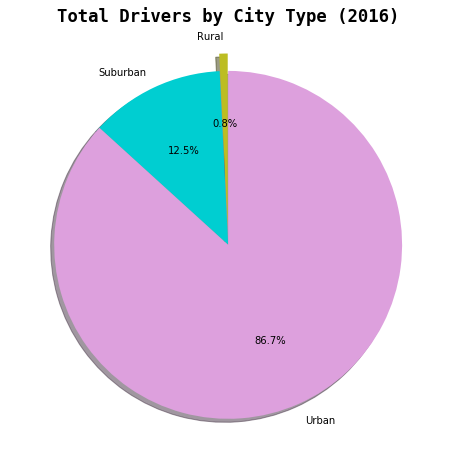

In [173]:
# Calculate Ride Percents
total_drivers = city_ride_df["driver_count"].sum()
drivers = city_ride_df.groupby("type")["driver_count"].sum().sort_values(ascending=True)
drivers_percentages = drivers/total_drivers
sizes = list(drivers_percentages)
labels = drivers.index

# Build Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Drivers by City Type (2016)", **font)

# plt.axis('tight') # yo...why did this not work on this one chart, but works on others?

plt.show
# Save Figure
plt.savefig('TotalDriversCityType.png', bbox="tight")